In [1]:
import pandas as pd
import numpy as np
import datetime
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import dask.dataframe as dd
from dask.multiprocessing import get
import numpy as np
import librosa
from scipy import signal
from scipy.io import wavfile
from scipy.signal import butter,filtfilt
from scipy.stats import kurtosis
import scipy.signal as signal
from scipy.integrate import simps


In [2]:
# x,fs= librosa.load('/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/fffce9f0-a5e8-4bee-b13b-c671aac4a61c.webm')
# f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('E4'))
# # ans = extract_features(x,fs)

In [3]:
df = pd.read_csv('/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/metadata_compiled.csv')

In [4]:
df.head()

,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,quality_3,dyspnea_3,wheezing_3,stridor_3,choking_3,congestion_3,nothing_3,cough_type_3,diagnosis_3,severity_3
0,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,-16.5,-71.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,2020-04-13T22:23:06.997578+00:00,0.9968,NaN,NaN,21.0,male,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001c85a8-cc4d-4921-9297-848be52d4715,2020-04-17T15:24:35.822355+00:00,0.0735,40.6,-3.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

import numpy as np
import pandas as pd
 


In [6]:
# df['datetime']
# df.columns
# date_string = str(df['datetime'])
# dt = datetime.date.fromisoformat(date_string)

In [7]:
# df['date']=pd.to_datetime(row['date']).apply(lambda t: t.replace(minute=15*(t.minute//15)))
#                 .dt.strftime('%H:%M')

df['date'] = pd.to_datetime(df['datetime'])

In [8]:
df['date_issued:year'] = df['date'].dt.year
df['date_issued:month'] = df['date'].dt.month
df['date_issued:day'] = df['date'].dt.day
df['date_issued:day_of_week'] = df['date'].dt.day_of_week
df['date_issued:day_of_year'] = df['date'].dt.day_of_year

In [9]:
df.head()

,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,nothing_3,cough_type_3,diagnosis_3,severity_3,date,date_issued:year,date_issued:month,date_issued:day,date_issued:day_of_week,date_issued:day_of_year
0,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,healthy,...,NaN,NaN,NaN,NaN,2020-04-13 21:30:59.801831+00:00,2020,4,13,0,104
1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,healthy,...,NaN,NaN,NaN,NaN,2020-04-12 04:02:18.159383+00:00,2020,4,12,6,103
2,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,-16.5,-71.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-04-15 01:03:59.029326+00:00,2020,4,15,2,106
3,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,2020-04-13T22:23:06.997578+00:00,0.9968,NaN,NaN,21.0,male,False,False,healthy,...,NaN,NaN,NaN,NaN,2020-04-13 22:23:06.997578+00:00,2020,4,13,0,104
4,001c85a8-cc4d-4921-9297-848be52d4715,2020-04-17T15:24:35.822355+00:00,0.0735,40.6,-3.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-04-17 15:24:35.822355+00:00,2020,4,17,4,108


In [10]:
def get_time_interval(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16<= hour <20:
        return 'Evening'
    else: 
        return 'Night'

df['TimeOfDay'] = df['date'].dt.hour.apply(get_time_interval)


In [11]:
def categorize_age(age):
    if age < 18:
        return 'Children'
    elif 18 <= age < 60:
        return 'Adults'
    else:
        return 'Seniors'

# Create a new column "AgeGroup" based on the age categories
df['AgeGroup'] = df['age'].apply(categorize_age)

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [13]:
df.columns

Index(['uuid', 'datetime', 'cough_detected', 'latitude', 'longitude', 'age',
       'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
       'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1',
       'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1',
       'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2',
       'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2',
       'quality_3', 'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3',
       'congestion_3', 'nothing_3', 'cough_type_3', 'diagnosis_3',
       'severity_3', 'date', 'date_issued:year', 'date_issued:month',
       'date_issued:day', 'date_issued:day_of_week', 'date_issued:day_of_year',
       'TimeOfDay', 'AgeGroup'],
      dtype='object')

In [14]:
Coordinate_clean_data = df.dropna(subset=['latitude', 'longitude', 'cough_detected', 'status'], inplace=False)

In [15]:
coordinates = Coordinate_clean_data[['latitude', 'longitude']]
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates)
wcss = []  # Within-Cluster-Sum-of-Squares
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_coordinates)
    wcss.append(kmeans.inertia_)

/home/abrol/miniconda3/envs/Cough/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/abrol/miniconda3/envs/Cough/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/abrol/miniconda3/envs/Cough/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/abrol/miniconda3/envs/Cough/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

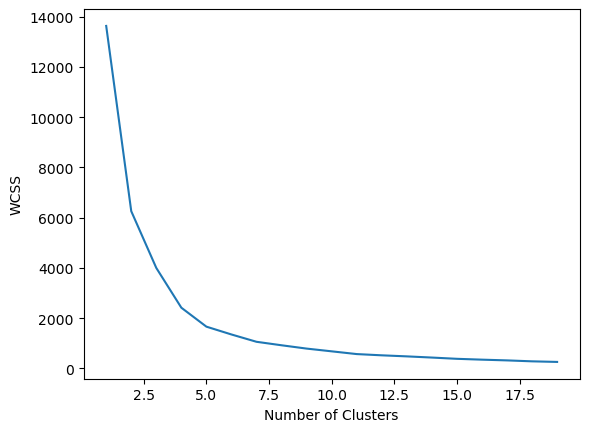

In [16]:
# Plot the Elbow graph to choose K
plt.plot(range(1, 20), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [17]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
coordinates['Cluster'] = kmeans.fit_predict(scaled_coordinates)

/home/abrol/miniconda3/envs/Cough/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_190839/2318274327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordinates['Cluster'] = kmeans.fit_predict(scaled_coordinates)


In [18]:
from pprint import pprint 
cluster_stats = pd.DataFrame()

# Analyze clustering statistics for each column within each cluster
for cluster in range(5):
    cluster_data = coordinates[coordinates['Cluster'] == cluster]
    cluster_stats['Cluster ' + str(cluster) + ' - Mean'] = cluster_data.mean()
    cluster_stats['Cluster ' + str(cluster) + ' - Median'] = cluster_data.median()
    cluster_stats['Cluster ' + str(cluster) + ' - Std Dev'] = cluster_data.std()
    # You can add more statistics as needed

# Display the clustering statistics DataFrame
pprint(cluster_stats)

           Cluster 0 - Mean  Cluster 0 - Median  Cluster 0 - Std Dev  \
latitude          41.853187                41.0             5.491405   
longitude         13.684136                 7.4            15.506127   
Cluster            0.000000                 0.0             0.000000   

           Cluster 1 - Mean  Cluster 1 - Median  Cluster 1 - Std Dev  \
latitude           2.695161                4.25            13.315169   
longitude         86.760484               80.60            31.898513   
Cluster            1.000000                1.00             0.000000   

           Cluster 2 - Mean  Cluster 2 - Median  Cluster 2 - Std Dev  \
latitude         -17.370261               -17.2            13.677236   
longitude        -60.310308               -62.7            20.253698   
Cluster            2.000000                 2.0             0.000000   

           Cluster 3 - Mean  Cluster 3 - Median  Cluster 3 - Std Dev  \
latitude          32.222887                34.8            10

In [19]:
# path = '/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/'

In [20]:
# #Number of audio files in the dataset
# dataset_directory = '/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/'

# audio_files = [os.path.join(dataset_directory, file) for file in os.listdir(dataset_directory) if file.endswith('.webm')]

# num_audio_samples = len(audio_files)

# print("Number of audio samples in the dataset:", num_audio_samples)

In [21]:
# # length of each file:
# duration_list = []
# sampling_rate = []
# for audio_file in audio_files:
#     # Load the audio file
#     y, sr = librosa.load(audio_file)
#     # Calculate the duration in seconds
#     duration = librosa.get_duration(y=y, sr=sr)

#     duration_list.append(duration)
#     sampling_rate.append(y)
    


In [22]:
# df['date']

In [23]:
import time
import requests
 
# my_datetime = datetime.date(2021, 8, 6)
# print("Unix_Time: ",
#       (time.mktime(my_datetime.timetuple())))

In [24]:
# api_key = "b496319a48891f3b8be25316cea3f7e5"
# latitude = "48.858844"  # Paris
# longitude = "2.294351"  # Paris
# date = "2023-04-15"

# # Request historical weather data from OpenWeatherMap
# url = f"http://history.openweathermap.org/data/2.5/history/city?lat={latitude}&lon={longitude}&start={date}&end={date}&appid={api_key}"
# response = requests.get(url)
# print(response)

In [25]:
# api_key = "b496319a48891f3b8be25316cea3f7e5"
# for i in range(len(df['date'])):
#     my_datetime = datetime.date(df['date_issued:year'][i], df['date_issued:month'][i], df['date_issued:day'][i])
#     time_ = time.mktime(my_datetime.timetuple())
#     latitude = df["latitude"]  # Paris
#     longitude = df["longitude"] 
#     response = requests.get(url)
#     print(response)

In [26]:
def season(date, latitude):
    ''' date is a datetime object
        hemisphere is either 'north' or 'south', dependent on long/lat.
    '''
    if latitude<=0:
        hemisphere = 'south'
    else: 
        hemisphere = 'north'
    md = date.month * 100 + date.day

    if ((md > 320) and (md < 621)):
        s = 0 #spring
    elif ((md > 620) and (md < 923)):
        s = 1 #summer
    elif ((md > 922) and (md < 1223)):
        s = 2 #fall
    else:
        s = 3 #winter

    if hemisphere != 'north':
        if s < 2:
            s += 2 
        else:
            s -= 2

    return s

In [27]:
df["Season"] = -1
for i in range(len(df)):
    df['Season'][i]  = season(df['date'][i], df['latitude'][i])

df["Season"].replace({0:"Spring",
                      1:"Summer",
                      2:"Fall",
                      3:"winter"}, inplace=True )   

/tmp/ipykernel_190839/3495311465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'][i]  = season(df['date'][i], df['latitude'][i])


In [28]:
df[["status", "cough_detected"]]

,status,cough_detected
0,healthy,0.9609
1,healthy,0.9301
2,NaN,0.0482
3,healthy,0.9968
4,NaN,0.0735
...,...,...
20067,healthy,0.7154
20068,symptomatic,0.5257
20069,NaN,0.1945
20070,healthy,0.0243


In [29]:
# https://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}&appid={API key}

In [30]:
# import requests

# # Replace with your OpenWeatherMap API key
# api_key = "b496319a48891f3b8be25316cea3f7e5"

# # Replace with the latitude, longitude, and date you want to query
# latitude = "38.536694"  # Paris
# longitude = "68.077742"  # Paris
# date = time_

# # Request historical weather data from OpenWeatherMap
# url = f"http://history.openweathermap.org/data/2.5/history/city?lat={latitude}&lon={longitude}&start={date}&end={date}&appid={api_key}"
# response = requests.get(url)
# print(response)

# # if response.status_code == 200:
# #     weather_data = response.json()
    
# #     # Extract and analyze relevant weather data to determine the season
# #     temperature = weather_data['list'][0]['main']['temp']
# #     daylight_hours = weather_data['list'][0]['daylight']
# #     precipitation = weather_data['list'][0]['rain']

# #     # Based on the extracted data, make an educated guess about the season
# #     season = "Spring"  # You can implement the season determination logic here
# #     print(f"Season on Earth: {season}")
# # else:
# #     print(f"Failed to retrieve weather data. Status code: {response.status_code}")


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('your_dataset.csv')

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['COVID-19 Status'])

# Perform the Chi-Square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Define your chosen significance level (alpha)
alpha = 0.05

# Compare the p-value to alpha
if p < alpha:
    print("Reject the null hypothesis. There is a statistically significant association between gender and COVID-19 status.")
else:
    print("Fail to reject the null hypothesis. No statistically significant association.")
